In [40]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [43]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
clinic_mean = clinical_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
clinic_mean = pd.DataFrame(clinic_mean)

# Flatten the column headings
clinic_mean = clinic_mean.reset_index()

# Preview DataFrame
clinic_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [45]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
clinic_sem = clinical_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
clinic_sem = pd.DataFrame(clinic_sem)

# Preview DataFrame
clinic_sem.head().reset_index()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [46]:
# Minor Data Munging to Re-Format the Data Frames
clinic_mean = clinic_mean.reset_index()
clinic_pivot_mean = clinic_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

clinic_sem = clinic_sem.reset_index()
clinic_pivot_sem = clinic_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
clinic_pivot_mean.head()
# Preview that Reformatting worked
#gc=pd.DataFrame(gc)
#gc=gc.reset_index()
#munge_3x=gc.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


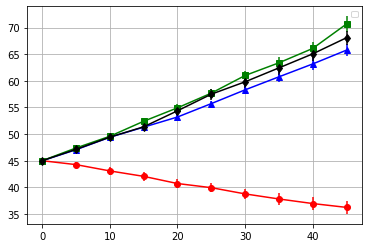

In [47]:
# Generate the Plot (with Error Bars)
plt.errorbar(clinic_pivot_mean.index, clinic_pivot_mean["Capomulin"], yerr=clinic_pivot_sem["Capomulin"], color="r", marker="o")


plt.errorbar(clinic_pivot_mean.index, clinic_pivot_mean["Infubinol"], yerr=clinic_pivot_sem["Infubinol"], color="b", marker="^")
plt.errorbar(clinic_pivot_mean.index, clinic_pivot_mean["Ketapril"], yerr=clinic_pivot_sem["Ketapril"], color="g", marker="s")

plt.errorbar(clinic_pivot_mean.index, clinic_pivot_mean["Placebo"], yerr=clinic_pivot_sem["Placebo"], color="k", marker="d")


plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure


# Show the Figure
plt.show()

In [28]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [65]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = clinical_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
meta_mean = pd.DataFrame(meta_mean)

# Preview DataFrame
meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [66]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = clinical_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
meta_sem = pd.DataFrame(meta_sem)

# Preview DataFrame
meta_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [69]:


# Minor Data Munging to Re-Format the Data Frames
meta_mean = meta_mean.reset_index()
meta_pivot_mean = meta_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

meta_sem = meta_sem.reset_index()
meta_pivot_sem = meta_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
meta_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


No handles with labels found to put in legend.


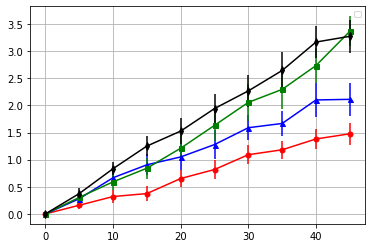

In [70]:

plt.errorbar(meta_pivot_mean.index, meta_pivot_mean["Capomulin"], yerr=meta_pivot_sem["Capomulin"], color="r", marker="o", markersize=5)



plt.errorbar(meta_pivot_mean.index, meta_pivot_mean["Infubinol"], yerr=meta_pivot_sem["Infubinol"], color="b", marker="^", markersize=5)

plt.errorbar(meta_pivot_mean.index, meta_pivot_mean["Ketapril"], yerr=meta_pivot_sem["Ketapril"], color="g", marker="s", markersize=5)
plt.errorbar(meta_pivot_mean.index, meta_pivot_mean["Placebo"], yerr=meta_pivot_sem["Placebo"], color="k", marker="d", markersize=5)

plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [72]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

survival=clinical_data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
# Convert to DataFrame
survival=pd.DataFrame({"Mouse Count": survival}).reset_index()
# Preview DataFrame
survival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [73]:

# Preview the Data Frame
munge3=survival.reset_index()

munge4=munge3.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
munge4.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')


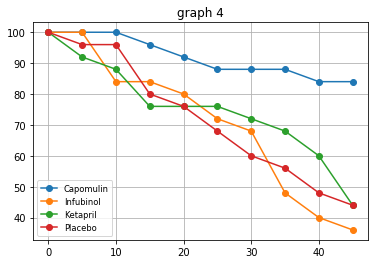

In [74]:
## Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
list_mark=['o', '^', 's', 'd']
label_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
print(munge4.columns)
for i in range(0, 4):
# Save the Figure
#     plt.plot(x_axis, munge['Tumor Volume (mm3)'][str(lst[i][1])], marker='o')
    plt.plot(100* munge4[str(label_list[i])]/25, marker='o', label=label_list[i])
   # plt.plot(x_axis, gc['Tumor Volume (mm3)'][(lst2[i][1])])
    i+=1
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.title("graph 4")
plt.savefig("C:/Users/ppruc/Desktop/matplotlib-challenge/graph4.png")
plt.show()
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [77]:
# Calculate the percent changes for each drug
pct_change =  100 * (clinic_pivot_mean.iloc[-1] - clinic_pivot_mean.iloc[0]) / clinic_pivot_mean.iloc[0]
pct_change_sem =  100 * (clinic_pivot_sem.iloc[-1] - clinic_pivot_sem.iloc[0]) / clinic_pivot_sem.iloc[0]

# Display the data to confirm
pct_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

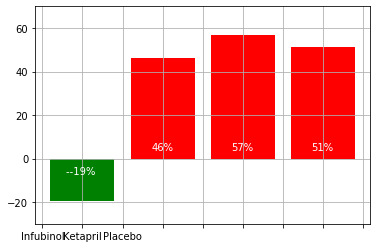

In [85]:
pct_changes = (pct_change["Capomulin"], 
               pct_change["Infubinol"], 
               pct_change["Ketapril"], 
               pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], color='red')

# Orient widths. Add labels, tick marks, etc. 

ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)